# Python for Creating CSV and Preliminary Reporting

In [1]:
import csv
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

%matplotlib inline
plt.style.use('ggplot')

## Load Data and Write to CSV


In [2]:
with open("roman-amphitheaters.geojson") as f:
    j = json.load(f)

In [3]:
# If there is one, I'd welcome a more pythonic approach. One that 
# accomodates the variable data model supported by JSON.

d = []
for feature in j['features']:
    
    # Check for optional properties

    if 'latintoponym' in feature['properties'].keys():
        latintoponym = feature['properties']['latintoponym']
    else:
        latintoponym = ''    

    if 'welchid' in feature['properties'].keys():
        welchid = feature['properties']['welchid']
    else:
        welchid = ''

    if 'golvinid' in feature['properties'].keys():
        golvinid = feature['properties']['golvinid']
    else:
        golvinid = ''

    if 'buildingtype' in feature['properties'].keys():
        buildingtype = feature['properties']['buildingtype']
    else:
        buildingtype = ''
        
    if 'buildingtype' in feature['properties'].keys():
        buildingtype = feature['properties']['buildingtype']
    else:
        buildingtype = ''
 
    if 'chronogroup' in feature['properties'].keys():
        chronogroup = feature['properties']['chronogroup']
    else:
        chronogroup = ''

    secondcentury = True
    if 'exclude' in feature['properties'].keys():
        secondcentury = False

    if 'capacity' in feature['properties'].keys():
        capacity = feature['properties']['capacity']['quantity']
    else:
        capacity = ''

    if 'province' in feature['properties'].keys():
        romanregion = feature['properties']['province']
    elif 'region' in feature['properties'].keys():
        romanregion = feature['properties']['region']
    else:
        romanregion = ''
        
    arenamajor = ''
    arenaminor = ''
    extmajor = ''
    extminor = ''
    exteriorheight = ''
    if 'dimensions' in feature['properties'].keys():
        dimensions = feature['properties']['dimensions']
        
        if 'arenamajor' in dimensions.keys():
            arenamajor = dimensions['arenamajor']

        if 'arenaminor' in dimensions.keys():
            arenaminor = dimensions['arenaminor']
            
        if 'exteriormajor' in dimensions.keys():
            extmajor = dimensions['exteriormajor']

        if 'exteriorminor' in dimensions.keys():
            extminor = dimensions['exteriorminor']
            
        if 'exteriorheight' in dimensions.keys():
            exteriorheight = dimensions['exteriorheight']
            
    d.append((feature['id'],
              feature['properties']['title'],
              feature['properties']['label'],
              latintoponym,
              feature['properties']['pleiades'],
              welchid,
              golvinid,
              buildingtype,
              chronogroup,
              secondcentury,
              capacity,
              feature['properties']['moderncountry'],
              romanregion,
              arenamajor,
              arenaminor,
              extmajor,
              extminor,
              exteriorheight,
              feature['geometry']['coordinates'][0],
              feature['geometry']['coordinates'][1],
              feature['geometry']['coordinates'][2]))

ramphs_df = pd.DataFrame(d, columns=(
 'id',    # short id
 'title', # longer title
 'label', # short label
 'latintoponym', # latin toponym
 'pleiades', # pleiades https uri
 'welchid',  # id in Welch
 'golvinid', # id in Golvin
 'buildingtype',  # usually 'amphitheater'
 'chronogroup',   # label for the chronological group
 'secondcentury', # is this an amphitheater that was in use in 2nd century
 'capacity',    # capacity as integer
 'modcountry',  # modern country
 'romanregion', # province or augustan region of italy
 'arenamajor', # long axis of arena in meters
 'arenaminor', # short axis of arena in meters
 'extmajor',   # long axis of exterior
 'extminor', # short axis of exterior
 'exteriorheight',   # height of exterior wall if known
 'longitude', # latitude
 'latitude', # longitude
 'elevation'  # elevation in meters.
 )) 

ramphs_df[['capacity','elevation','arenamajor','arenaminor',
        'extmajor','extminor','exteriorheight']] = ramphs_df[['capacity','elevation','arenamajor',
        'arenaminor','extmajor','extminor','exteriorheight']].apply(pd.to_numeric)

In [4]:
ramphs_df.to_csv("roman-amphitheaters.csv", index = False, quoting = csv.QUOTE_NONNUMERIC)

## Basic Reporting

In [5]:
ramphs_df.head(2)

,id,title,label,latintoponym,pleiades,welchid,golvinid,buildingtype,chronogroup,secondcentury,...,modcountry,romanregion,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation
0,duraEuroposAmphitheater,Amphitheater at Dura Europos,Dura,Dura Europus,https://pleiades.stoa.org/places/893989,,129,amphitheater,severan,False,...,Syria,syria,31.0,25.0,50.0,44.0,NaN,40.728926,34.749855,223
1,arlesAmphitheater,Amphitheater at Arles,Arles,Arelate,https://pleiades.stoa.org/places/148217,,154,amphitheater,flavian,True,...,France,narbonensis,47.0,32.0,136.0,107.0,NaN,4.631111,43.677778,21


In [6]:
ramphs_df.describe()

,capacity,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation
count,123.000000,150.000000,149.000000,179.000000,165.000000,3.000000,260.000000,260.000000,260.000000
mean,12242.146341,57.176667,38.089933,97.749330,77.369758,41.483333,10.665040,42.223168,191.407692
std,9185.505496,14.263028,8.499440,29.769994,24.887976,9.859048,9.008302,4.968707,210.000926
min,1000.000000,25.000000,19.000000,39.600000,34.000000,32.450000,-8.493330,31.608189,-121.000000
25%,5265.000000,47.125000,33.000000,77.000000,59.400000,36.225000,5.514918,38.480299,32.000000
50%,10000.000000,58.000000,39.000000,95.000000,75.000000,40.000000,10.954128,42.089044,117.500000
75%,16000.000000,67.000000,43.000000,117.860000,94.500000,46.000000,14.250144,45.479995,282.250000
max,50000.000000,101.000000,62.000000,189.000000,156.000000,52.000000,40.728926,55.602600,1170.000000


In [7]:
# Confirm that CSV is readable
# It would be nice if the "numeric pattern" string survived as strings.
pd.read_csv("roman-amphitheaters.csv", quoting = 2).describe()

,welchid,golvinid,capacity,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation
count,18.000000,82.000000,123.000000,150.000000,149.000000,179.000000,165.000000,3.000000,260.000000,260.000000,260.000000
mean,9.777778,109.524390,12242.146341,57.176667,38.089933,97.749330,77.369758,41.483333,10.665040,42.223168,191.407692
std,5.704029,63.329089,9185.505496,14.263028,8.499440,29.769994,24.887976,9.859048,9.008302,4.968707,210.000926
min,1.000000,12.000000,1000.000000,25.000000,19.000000,39.600000,34.000000,32.450000,-8.493330,31.608189,-121.000000
25%,5.250000,64.250000,5265.000000,47.125000,33.000000,77.000000,59.400000,36.225000,5.514918,38.480299,32.000000
50%,9.500000,107.000000,10000.000000,58.000000,39.000000,95.000000,75.000000,40.000000,10.954128,42.089044,117.500000
75%,14.500000,145.250000,16000.000000,67.000000,43.000000,117.860000,94.500000,46.000000,14.250144,45.479995,282.250000
max,19.000000,298.000000,50000.000000,101.000000,62.000000,189.000000,156.000000,52.000000,40.728926,55.602600,1170.000000


In [8]:
# which have heights
ramphs_df[ramphs_df.exteriorheight > 0]

,id,title,label,latintoponym,pleiades,welchid,golvinid,buildingtype,chronogroup,secondcentury,...,modcountry,romanregion,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation
4,romeFlavianAmphitheater,Flavian Amphitheater at Rome,Colosseum,,https://pleiades.stoa.org/places/423025,,152,amphitheater,flavian,True,...,Italy,regio-i,83.00,48.00,189.00,156.0,52.00,12.492269,41.890169,22
90,thysdrusAmphitheater,Amphitheater at Thysdrus,Thysdrus (lg.),,https://pleiades.stoa.org/places/324835,,,amphitheater,post-severan,False,...,Tunisia,proconsularis,65.00,39.00,148.00,122.0,40.00,10.706939,35.296390,111
97,pulaAmphitheater,Amphitheater at Pula,Pula,Colonia Pietas Iulia Pola Pollentia Herculanea,https://pleiades.stoa.org/places/197448,,,amphitheater,julio-claudian,True,...,Croatia,regio-x,67.95,41.65,132.45,105.1,32.45,13.850243,44.873229,16


In [9]:
# which don't have exteriormajor
ramphs_df[pd.isnull(ramphs_df.extmajor) ][['id','latintoponym','golvinid','extmajor','arenamajor','latitude','longitude']]

,id,latintoponym,golvinid,extmajor,arenamajor,latitude,longitude
3,ludusMagnusArena,Ludus Magnus,,NaN,NaN,41.889950,12.494913
13,pozzuoliEarlyAmphitheater,Puteoli,,NaN,NaN,40.826239,14.127615
16,hadrianVillaAmphitheater,Villa Hadriani,,NaN,NaN,41.941708,12.778929
20,nijmegenAmphitheater,Ulpia Noviomagus,,NaN,NaN,51.838523,5.878859
22,carnuntumLudus,Carnuntum,,NaN,NaN,48.109807,16.848689
37,parisAmphitheater,Lutetia Parisiorum,,NaN,NaN,48.845097,2.352855
39,cyreneAmphitheater,,,NaN,32.7,32.824526,21.850808
46,gennesAmphitheater,Geinum,,NaN,44.0,47.335219,-0.238606
47,scythopolisNysaAmphitheater,,,NaN,NaN,32.498395,35.501631
56,lixusAmphitheater,,,NaN,NaN,35.199900,-6.108468


In [10]:
ramphs_df[ramphs_df.golvinid == '' ][['id','latintoponym','golvinid','extmajor','arenamajor','latitude','longitude']]

,id,latintoponym,golvinid,extmajor,arenamajor,latitude,longitude
2,lyonAmphitheater,Lugdunum,,105.0,67.6,45.770556,4.830556
3,ludusMagnusArena,Ludus Magnus,,NaN,NaN,41.889950,12.494913
6,eleutheropolisAmphitheater,Eleutheropolis,,71.0,47.0,31.608189,34.893845
7,pompeiiAmphitheater,Pompeii,,135.0,66.0,40.751213,14.495262
9,newsteadAmphitheater,Trimontium,,70.0,37.0,55.602600,-2.691900
11,cumaeAmphitheater,Cumae,,114.0,NaN,40.841847,14.056000
13,pozzuoliEarlyAmphitheater,Puteoli,,NaN,NaN,40.826239,14.127615
15,carthageAmphitheater,Carthago,,120.0,64.0,36.856078,10.314924
16,hadrianVillaAmphitheater,Villa Hadriani,,NaN,NaN,41.941708,12.778929
20,nijmegenAmphitheater,Ulpia Noviomagus,,NaN,NaN,51.838523,5.878859


In [11]:
ramphs_df[ramphs_df.latintoponym == '' ][['id','latintoponym','golvinid','extmajor','arenamajor','latitude','longitude']]

,id,latintoponym,golvinid,extmajor,arenamajor,latitude,longitude
4,romeFlavianAmphitheater,,152,189.00,83.00,41.890169,12.492269
5,romeAmphitheatrumCastrense,,189,88.00,NaN,41.887715,12.515144
19,porolissumAmphitheater,,39,84.00,64.00,47.177552,23.154052
28,italicaAmphitheater,,168,160.00,70.00,37.443893,-6.046742
34,viminaciumAmphitheater,,,85.00,NaN,44.737985,21.220083
35,flaviaSolvaAmphitheater,,,97.00,85.00,46.767153,15.565777
38,octodurusForumClaudiiVallensiumAmphitheater,,,118.00,74.00,46.094356,7.073493
39,cyreneAmphitheater,,,NaN,32.70,32.824526,21.850808
44,charterhouseAmphitheater,,,50.00,32.00,51.305437,-2.720301
47,scythopolisNysaAmphitheater,,,NaN,NaN,32.498395,35.501631


## Duplicate Checking

In [12]:
dups = ramphs_df[ramphs_df.label.duplicated(keep = False)]\
[['id','pleiades','latintoponym','latitude','longitude']].sort_values('pleiades')

len(dups) == 0

True

In [13]:
dups = ramphs_df[ramphs_df.id.duplicated(keep = False)]\
[['id','pleiades','latintoponym','latitude','longitude']].sort_values('pleiades')

len(dups) == 0

True

In [14]:
dups = ramphs_df[ramphs_df.pleiades.duplicated(keep = False)]\
[['id','pleiades','latintoponym','latitude','longitude']].sort_values('pleiades')

len(dups) == 15

True

In [15]:
dups = ramphs_df[ramphs_df.latintoponym.duplicated(keep = False)]\
[['id','pleiades','latintoponym',
  'latitude','longitude']].sort_values('pleiades')

len(dups.query("latintoponym != ''")) == 11

True

## Basic Mapping

In [16]:
rgdf = gpd.read_file("roman-amphitheaters.geojson")

In [17]:
rgdf.crs

{'init': 'epsg:4326'}

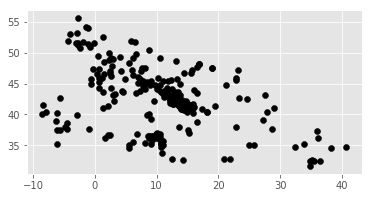

In [18]:
rgdf.plot(color = 'black')

In [19]:
# this is simple enough that all steps are in one cell
c = []
for cgrp in j['romanamphitheaterschronogroups']:
    c.append((cgrp['id'],
    cgrp['startdate'],
    cgrp['enddate']))
    
chrono_df  = pd.DataFrame(c, columns=('chronogroup','startdate','enddate'))

chrono_df.to_csv("chronogrps.csv", index = False, quoting = csv.QUOTE_NONNUMERIC)
chrono_df.head(2)

,chronogroup,startdate,enddate
0,republican,-70,-31
1,caesarean,-49,-44


In [20]:
ramphs_df.merge(chrono_df)

,id,title,label,latintoponym,pleiades,welchid,golvinid,buildingtype,chronogroup,secondcentury,...,arenamajor,arenaminor,extmajor,extminor,exteriorheight,longitude,latitude,elevation,startdate,enddate
0,duraEuroposAmphitheater,Amphitheater at Dura Europos,Dura,Dura Europus,https://pleiades.stoa.org/places/893989,,129,amphitheater,severan,False,...,31.00,25.00,50.0,44.0,NaN,40.728926,34.749855,223,193,235
1,romeAmphitheatrumCastrense,Amphitheatrum Castrense (Rome),Amph. Castrense,,https://pleiades.stoa.org/places/423025,,189,amphitheater,severan,False,...,NaN,NaN,88.0,75.8,NaN,12.515144,41.887715,48,193,235
2,marcianopolisAmphitheater,Amphitheater at Marcianopolis (Devnya),Marcianopolis,Marcianopolis,https://pleiades.stoa.org/places/216878,,127,amphitheater,severan,True,...,50.00,40.00,70.0,60.0,NaN,27.556674,43.218689,120,193,235
3,bararusAmphitheater,Amphitheater at Bararus,Bararus,,https://pleiades.stoa.org/places/324673,,,amphitheater,severan,False,...,63.75,37.50,98.0,73.5,NaN,10.791226,35.211828,68,193,235
4,castraAlbanaAmphitheater,Amphitheater at Castra Albana,Albana,,https://pleiades.stoa.org/places/422885,,190,amphitheater,severan,False,...,67.50,45.00,116.5,94.0,NaN,12.665010,41.732637,454,193,235
5,arlesAmphitheater,Amphitheater at Arles,Arles,Arelate,https://pleiades.stoa.org/places/148217,,154,amphitheater,flavian,True,...,47.00,32.00,136.0,107.0,NaN,4.631111,43.677778,21,69,96
6,romeFlavianAmphitheater,Flavian Amphitheater at Rome,Colosseum,,https://pleiades.stoa.org/places/423025,,152,amphitheater,flavian,True,...,83.00,48.00,189.0,156.0,52.0,12.492269,41.890169,22,69,96
7,newsteadAmphitheater,Amphitheater at Newstead,Newstead,Trimontium,https://pleiades.stoa.org/places/89304,,,amphitheater,flavian,True,...,37.00,23.00,70.0,60.0,NaN,-2.691900,55.602600,83,69,96
8,pozzuoliFlavianAmphitheater,Flavian Amphitheater at Pozzuoli,Pozzuoli (Flavian),Puteoli,https://pleiades.stoa.org/places/432815,,153,amphitheater,flavian,True,...,74.80,42.00,149.0,116.0,NaN,14.125315,40.825929,41,69,96
9,segobrigaAmphitheater,Amphitheater at Segobriga,Segobriga,Segobriga,https://pleiades.stoa.org/places/266036,,88,amphitheater,flavian,True,...,47.00,31.00,75.0,64.0,NaN,-2.813944,39.886018,817,69,96
